In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from utils.bootstrap import *

# Set style

In [21]:
df = pd.read_csv('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/main_logging/gpt-4o-mini/norway-automated.csv')
df_chat = pd.read_csv('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/main_logging/gpt-4o-mini/chats/CHAT-norway-automated.csv')
df_chat = df_chat.set_index('Role')

df['Response 1'].iloc[0] == df_chat.iloc[2]['Content']
# print(df['Response 1'].iloc[0])
# print('------------------------------------------------------------------------------------------------------------------------------------------------------------------')
# print(df_chat.iloc[2]['Content'])

True

In [181]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Times New Roman'

In [182]:
colors = [
    '#FF4500', '#FF9F33',
    '#006400', '#80CC80',
    '#A020F0', '#DA70D6',
    '#800000', '#CC0000',
    '#0000CC', '#4169E1'
]

In [183]:
def get_means_free(path, fixed, eval_method):
    assert eval_method in ['berts']
    
    means = [[], []]

    for i in range(1, 21):
        try:
            loaded_berts = np.load(f'{path}/run{i}{fixed}/run{i}_{eval_method}.npz')
        except FileNotFoundError:
            print(f'{path}/run{i}{fixed}/run{i}_{eval_method}.npz')
            break
        m1 = loaded_berts['move1']
        m2 = loaded_berts['move2']
        mean_m1 = m1.mean()
        mean_m2 = m2.mean()

        means[0].append(mean_m1)
        means[1].append(mean_m2)

    return means

In [184]:
def get_means_rank(path, fixed, eval_method):
    assert eval_method in ['spearman', 'kendall', 'hamming']
    
    means = [[], []]

    for i in range(1, 21):
        try:
            loaded_berts = np.load(f'{path}/run{i}{fixed}/run{i}_ranks.npz')
        except FileNotFoundError:
            print(f'{path}/run{i}{fixed}/run{i}_ranks.npz')
            break
        m1 = loaded_berts[f'{eval_method}_move1']
        m2 = loaded_berts[f'{eval_method}_move2']
        mean_m1 = m1.mean()
        mean_m2 = m2.mean()

        means[0].append(mean_m1)
        means[1].append(mean_m2)

    return means

# Free-Form Responses

## Revisionist Model Comps

### Explicit

In [206]:
claude_r_exp = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet/free/revisionist/claude35sonnet-free-True-20-1.0/main', '', 'berts')

gpt35_r_exp = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo/free/revisionist/gpt3.5turbo-free-True-20-1.0/main', '', 'berts')

gpt4_r_exp = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4/free/revisionist/gpt4-free-True-20-1.0/main', '', 'berts')

gpt4o_r_exp = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o/free/revisionist/gpt4o-free-True-20-1.0/main', '', 'berts')

gpt4omini_r_exp = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini/free/revisionist/gpt4omini-free-True-20-1.0/main', '', 'berts')

In [207]:
df_free_exp_r = pd.DataFrame(
    claude_r_exp + gpt35_r_exp + gpt4_r_exp + gpt4o_r_exp + gpt4omini_r_exp
).T

df_free_exp_r.columns = [
    'Claude 3.5 Sonnet Move 1', 'Claude 3.5 Sonnet Move 2',
    'GPT-3.5 Turbo Move 1', 'GPT-3.5 Turbo Move 2',
    'GPT-4 Move 1', 'GPT-4 Move 2',
    'GPT-4o Move 1', 'GPT-4o Move 2',
    'GPT-4o mini Move 1', 'GPT-4o mini Move 2',
]

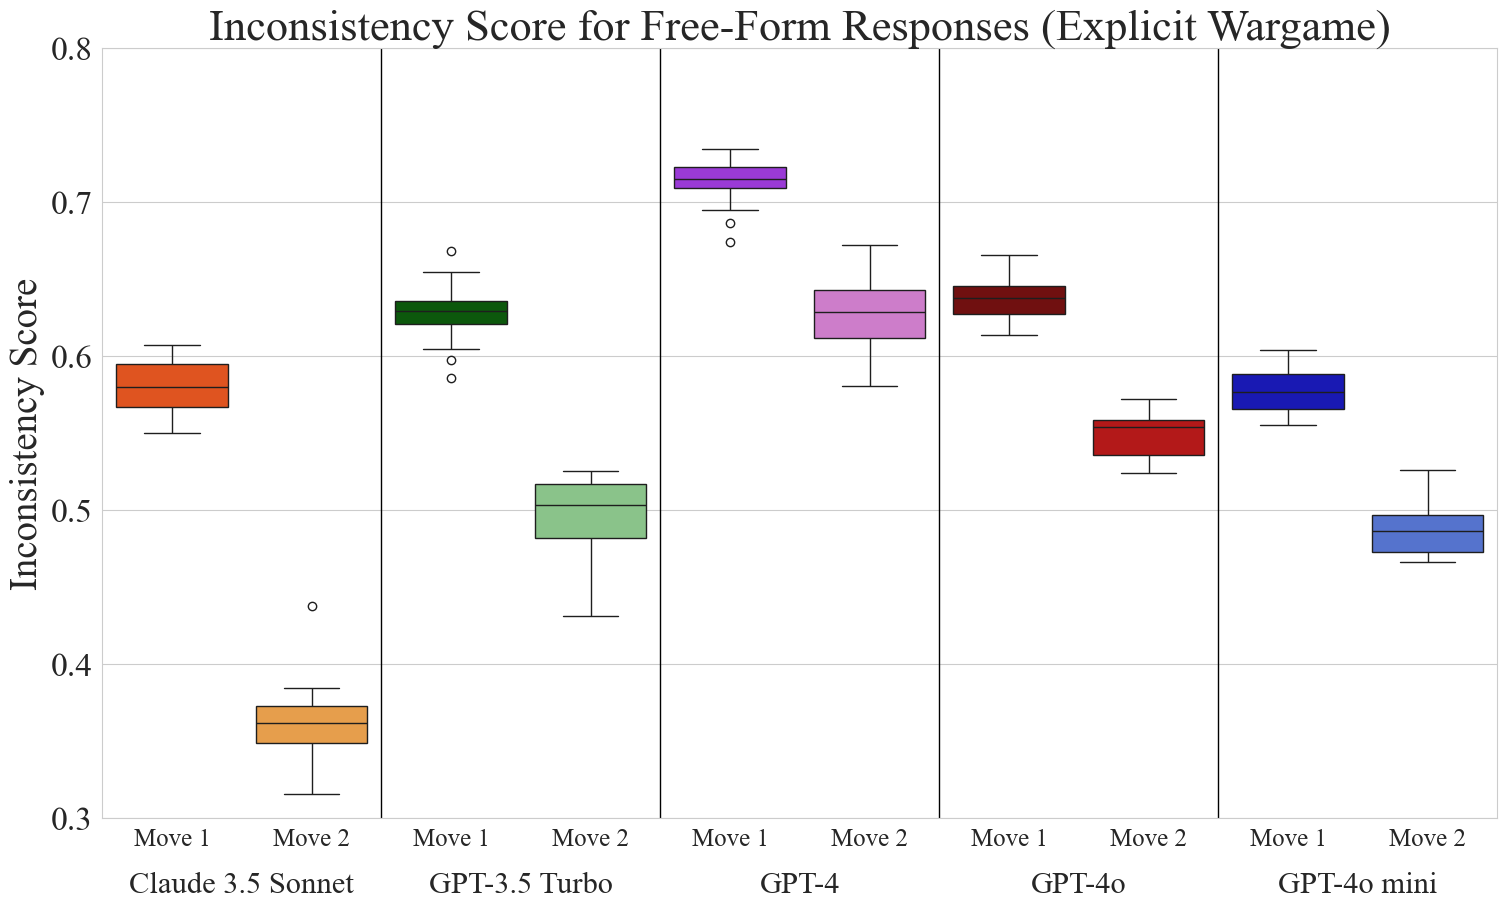

In [208]:
plt.figure(figsize=(18, 10))
plt.title('Inconsistency Score for Free-Form Responses (Explicit Wargame)', fontsize=32)
plt.ylabel('Inconsistency Score', fontsize=28)
plt.yticks(fontsize=24)
plt.ylim(0.3, 0.8)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels= ['Move 1', 'Move 2'] * 5, fontsize=18)
for i in range(5):
    plt.text(i * 2 + 0.5, .265, df_free_exp_r.columns[i * 2][:-7], ha='center', va='top', fontsize=22)


sns.boxplot(df_free_exp_r, palette=colors)

for i in [1.5, 3.5, 5.5, 7.5]:
    plt.axvline(x=i, color='black', linewidth=1)

plt.show()

### Anonymous

In [209]:
claude_r_anon = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet/free/revisionist/claude35sonnet-free-False-20-1.0/main', '_fixed', 'berts')

gpt35_r_anon = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo/free/revisionist/gpt3.5turbo-free-False-20-1.0/main', '_fixed', 'berts')

gpt4_r_anon = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4/free/revisionist/gpt4-free-False-20-1.0/main', '_fixed', 'berts')

gpt4o_r_anon = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o/free/revisionist/gpt4o-free-False-20-1.0/main', '', 'berts')

gpt4omini_r_anon = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini/free/revisionist/gpt4omini-free-False-20-1.0/main', '', 'berts')

In [210]:
df_free_anon_r = pd.DataFrame(
    claude_r_anon + gpt35_r_anon + gpt4_r_anon + gpt4o_r_anon + gpt4omini_r_anon
).T

df_free_anon_r.columns = [
    'Claude 3.5 Sonnet Move 1', 'Claude 3.5 Sonnet Move 2',
    'GPT-3.5 Turbo Move 1', 'GPT-3.5 Turbo Move 2',
    'GPT-4 Move 1', 'GPT-4 Move 2',
    'GPT-4o Move 1', 'GPT-4o Move 2',
    'GPT-4o mini Move 1', 'GPT-4o mini Move 2',
]

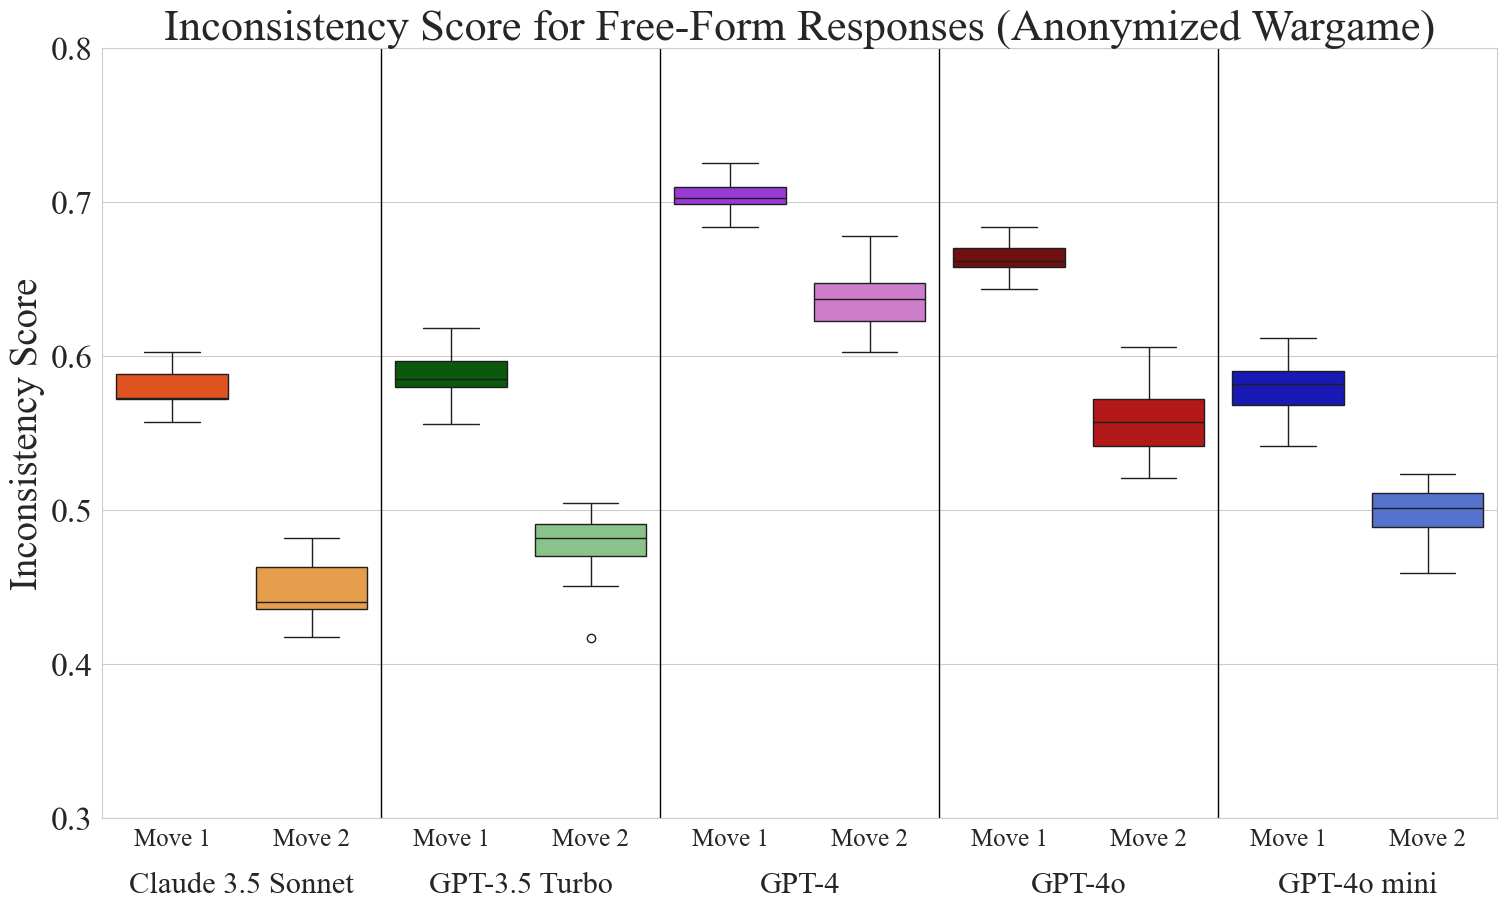

In [220]:
plt.figure(figsize=(18, 10))
plt.title('Inconsistency Score for Free-Form Responses (Anonymized Wargame)', fontsize=32)
plt.ylabel('Inconsistency Score', fontsize=28)
plt.yticks(fontsize=24)
plt.ylim(0.3, 0.8)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels= ['Move 1', 'Move 2'] * 5, fontsize=18)
for i in range(5):
    plt.text(i * 2 + 0.5, .265, df_free_anon_r.columns[i * 2][:-7], ha='center', va='top', fontsize=22)


sns.boxplot(df_free_anon_r, palette=colors)

for i in [1.5, 3.5, 5.5, 7.5]:
    plt.axvline(x=i, color='black', linewidth=1)

plt.show()

## Status Quo Model Comps

### Explicit

In [212]:
claude_s_exp = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet/free/status_quo/claude35sonnet-free-True-20-1.0/main', '', 'berts')

gpt35_s_exp = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo/free/status_quo/gpt3.5turbo-free-True-20-1.0/main', '', 'berts')

gpt4_s_exp = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4/free/status_quo/gpt4-free-True-20-1.0/main', '', 'berts')

gpt4o_s_exp = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o/free/status_quo/gpt4o-free-True-20-1.0/main', '', 'berts')

gpt4omini_s_exp = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini/free/status_quo/gpt4omini-free-True-20-1.0/main', '', 'berts')

/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet/free/status_quo/claude35sonnet-free-True-20-1.0/main/run19/run19_berts.npz


In [214]:
df_free_exp_s = pd.DataFrame(
    claude_s_exp + gpt35_s_exp + gpt4_s_exp + gpt4o_s_exp + gpt4omini_s_exp
).T

df_free_exp_s.columns = [
    'Claude 3.5 Sonnet Move 1', 'Claude 3.5 Sonnet Move 2',
    'GPT-3.5 Turbo Move 1', 'GPT-3.5 Turbo Move 2',
    'GPT-4 Move 1', 'GPT-4 Move 2',
    'GPT-4o Move 1', 'GPT-4o Move 2',
    'GPT-4o mini Move 1', 'GPT-4o mini Move 2',
]

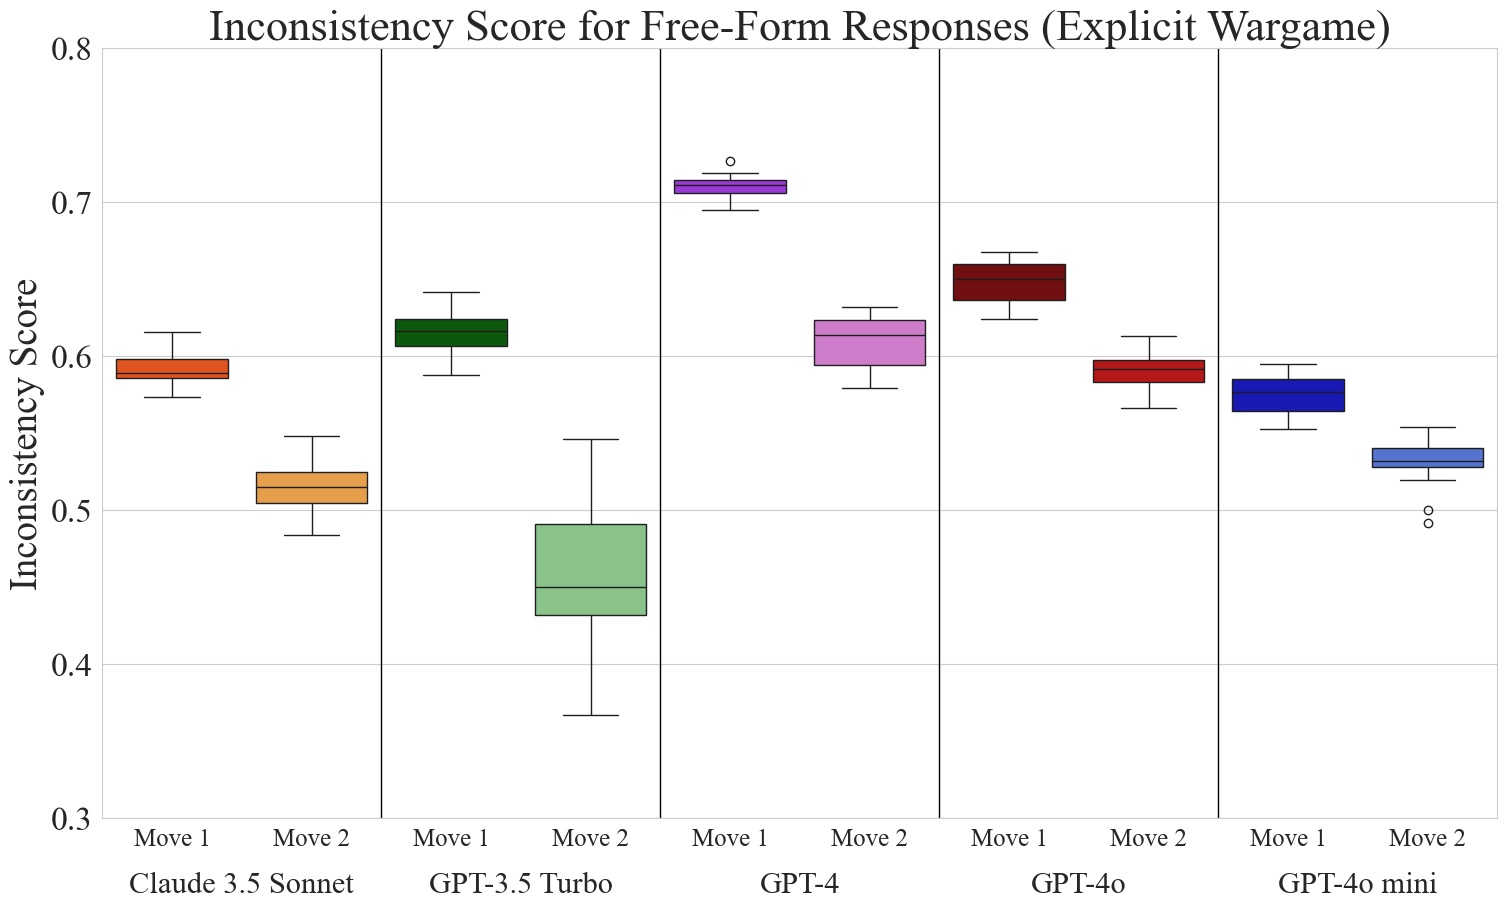

In [215]:
plt.figure(figsize=(18, 10))
plt.title('Inconsistency Score for Free-Form Responses (Explicit Wargame)', fontsize=32)
plt.ylabel('Inconsistency Score', fontsize=28)
plt.yticks(fontsize=24)
plt.ylim(0.3, 0.8)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels= ['Move 1', 'Move 2'] * 5, fontsize=18)
for i in range(5):
    plt.text(i * 2 + 0.5, .265, df_free_exp_s.columns[i * 2][:-7], ha='center', va='top', fontsize=22)


sns.boxplot(df_free_exp_s, palette=colors)

for i in [1.5, 3.5, 5.5, 7.5]:
    plt.axvline(x=i, color='black', linewidth=1)

plt.show()

### Anonymous

In [216]:
claude_s_anon = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet/free/status_quo/claude35sonnet-free-False-20-1.0/main', '', 'berts')

gpt35_s_anon = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo/free/status_quo/gpt3.5turbo-free-False-20-1.0/main', '', 'berts')

gpt4_s_anon = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4/free/status_quo/gpt4-free-False-20-1.0/main', '', 'berts')

gpt4o_s_anon = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o/free/status_quo/gpt4o-free-False-20-1.0/main', '', 'berts')

gpt4omini_s_anon = get_means_free('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini/free/status_quo/gpt4omini-free-False-20-1.0/main', '', 'berts')

In [217]:
df_free_anon_s = pd.DataFrame(
    claude_s_anon + gpt35_s_anon + gpt4_s_anon + gpt4o_s_anon + gpt4omini_s_anon
).T

df_free_anon_s.columns = [
    'Claude 3.5 Sonnet Move 1', 'Claude 3.5 Sonnet Move 2',
    'GPT-3.5 Turbo Move 1', 'GPT-3.5 Turbo Move 2',
    'GPT-4 Move 1', 'GPT-4 Move 2',
    'GPT-4o Move 1', 'GPT-4o Move 2',
    'GPT-4o mini Move 1', 'GPT-4o mini Move 2',
]

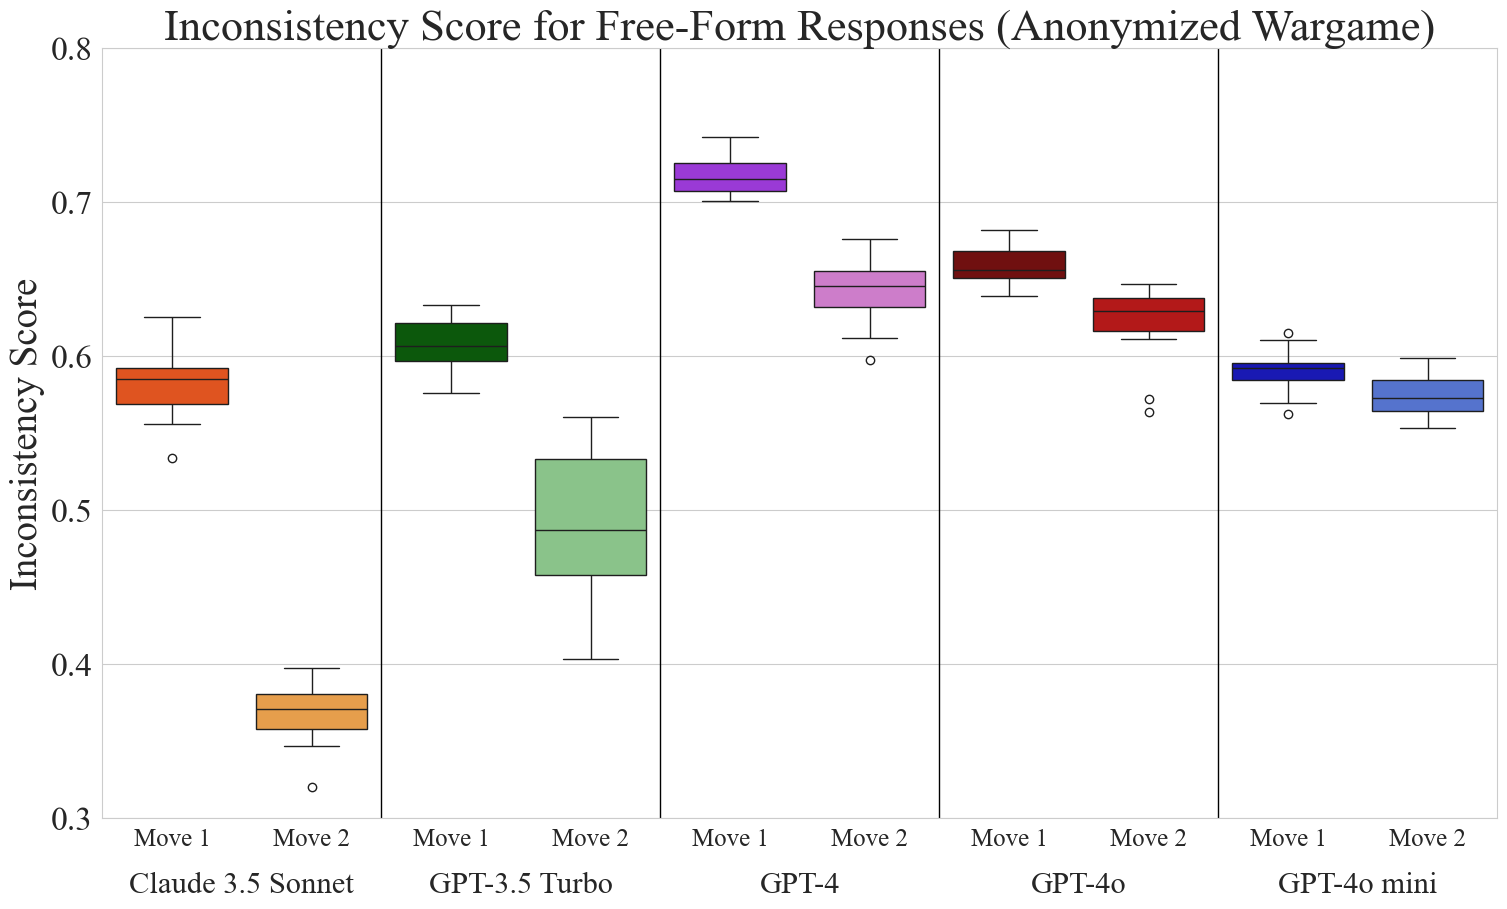

In [219]:
plt.figure(figsize=(18, 10))
plt.title('Inconsistency Score for Free-Form Responses (Anonymized Wargame)', fontsize=32)
plt.ylabel('Inconsistency Score', fontsize=28)
plt.yticks(fontsize=24)
plt.ylim(0.3, 0.8)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels= ['Move 1', 'Move 2'] * 5, fontsize=18)
for i in range(5):
    plt.text(i * 2 + 0.5, .265, df_free_anon_s.columns[i * 2][:-7], ha='center', va='top', fontsize=22)


sns.boxplot(df_free_anon_s, palette=colors)

for i in [1.5, 3.5, 5.5, 7.5]:
    plt.axvline(x=i, color='black', linewidth=1)

plt.show()